In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_percentage_error

In [2]:
data = pd.read_excel('TS_Data.xlsx')

In [3]:
data = data.tail(-1)

In [4]:
data = data[["Date","Marketing spends"]]
data.columns = ["Date","Value"]

In [5]:
data

,Date,Value
1,2017-01-01,176732
2,2017-02-01,180486
3,2017-03-01,180455
4,2017-04-01,185070
5,2017-05-01,195915
6,2017-06-01,194849
7,2017-07-01,175999
8,2017-08-01,167606
9,2017-09-01,204624
10,2017-10-01,208619


In [6]:
data.isnull().sum()

Date     0
Value    0
dtype: int64

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data.index = data['Date']

In [9]:
data = data.drop(columns=['Date'])

In [10]:
data

,Value
Date,
2017-01-01,176732
2017-02-01,180486
2017-03-01,180455
2017-04-01,185070
2017-05-01,195915
2017-06-01,194849
2017-07-01,175999
2017-08-01,167606
2017-09-01,204624


In [11]:
result = seasonal_decompose(data['Value'])

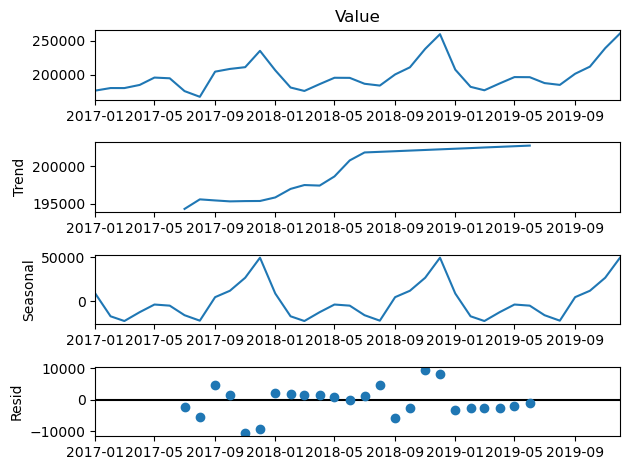

In [12]:
result.plot()
plt.show()

In [13]:
data['dt'] = data.index

In [14]:
type(data['dt'])

pandas.core.series.Series

In [15]:
data['dt'] = pd.to_datetime(data['dt'])

In [16]:
train = data[data['dt'].dt.year<2019]
test = data[data['dt'].dt.year>2018]

In [17]:
train.drop(columns=['dt'], inplace = True)
test.drop(columns=['dt'], inplace = True)

/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_25318/4112128423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=['dt'], inplace = True)
/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_25318/4112128423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns=['dt'], inplace = True)


In [18]:
model = LinearRegression()

In [19]:
train.shape

(24, 1)

In [20]:
test.shape

(12, 1)

In [21]:
np.array(range(1,25))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [22]:
train_model = pd.DataFrame(range(1,25), columns=['X'])
train_model['Y'] = train['Value'].values

In [23]:
train_model

,X,Y
0,1,176732
1,2,180486
2,3,180455
3,4,185070
4,5,195915
5,6,194849
6,7,175999
7,8,167606
8,9,204624
9,10,208619


In [24]:
model.fit(train_model[['X']], train_model['Y'])

LinearRegression()

In [25]:
train_model['linear_pred_Trend'] = model.predict(train_model[['X']])

<AxesSubplot:>

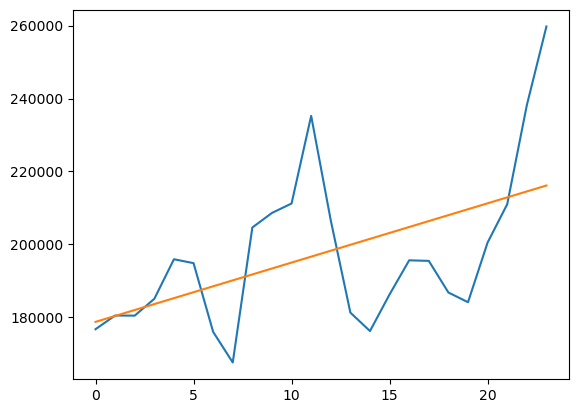

In [26]:
train_model['Y'].plot(kind = 'line')
train_model['linear_pred_Trend'].plot(kind = 'line')

In [27]:
train_model['linear_SI'] = train_model['Y'] - train_model['linear_pred_Trend']

In [28]:
train_model

,X,Y,linear_pred_Trend,linear_SI
0,1,176732,178744.213333,-2012.213333
1,2,180486,180370.169420,115.83058
2,3,180455,181996.125507,-1541.125507
3,4,185070,183622.081594,1447.918406
4,5,195915,185248.037681,10666.962319
5,6,194849,186873.993768,7975.006232
6,7,175999,188499.949855,-12500.949855
7,8,167606,190125.905942,-22519.905942
8,9,204624,191751.862029,12872.137971
9,10,208619,193377.818116,15241.181884


In [29]:
train_model['Month_component'] = 2* list(range(1,13)) 

In [30]:
train_model_seasonal_monthly_component = train_model.groupby('Month_component')['linear_SI'].mean()

In [31]:
train_model_seasonal_monthly_component

Month_component
1      3152.050145
2     -9241.405942
3    -13411.862029
4     -7702.818116
5       764.725797
6     -1469.730290
7    -16857.686377
8    -24011.142464
9      1059.401449
10     6678.945362
11    19922.989275
12    41116.533188
Name: linear_SI, dtype: float64

In [32]:
train_model

,X,Y,linear_pred_Trend,linear_SI,Month_component
0,1,176732,178744.213333,-2012.213333,1
1,2,180486,180370.169420,115.83058,2
2,3,180455,181996.125507,-1541.125507,3
3,4,185070,183622.081594,1447.918406,4
4,5,195915,185248.037681,10666.962319,5
5,6,194849,186873.993768,7975.006232,6
6,7,175999,188499.949855,-12500.949855,7
7,8,167606,190125.905942,-22519.905942,8
8,9,204624,191751.862029,12872.137971,9
9,10,208619,193377.818116,15241.181884,10


In [33]:
Average_Seasonality_Factor = pd.DataFrame(train_model_seasonal_monthly_component[train_model['Month_component']]).reset_index()
             

In [34]:
Average_Seasonality_Factor.columns = ["Month_component", "Average_Seasonality_Factor"]

In [35]:
Average_Seasonality_Factor

,Month_component,Average_Seasonality_Factor
0,1,3152.050145
1,2,-9241.405942
2,3,-13411.862029
3,4,-7702.818116
4,5,764.725797
5,6,-1469.730290
6,7,-16857.686377
7,8,-24011.142464
8,9,1059.401449
9,10,6678.945362


In [36]:
train_model['Average_Seasonality_Factor'] = Average_Seasonality_Factor['Average_Seasonality_Factor']


In [37]:
train_model

,X,Y,linear_pred_Trend,linear_SI,Month_component,Average_Seasonality_Factor
0,1,176732,178744.213333,-2012.213333,1,3152.050145
1,2,180486,180370.169420,115.83058,2,-9241.405942
2,3,180455,181996.125507,-1541.125507,3,-13411.862029
3,4,185070,183622.081594,1447.918406,4,-7702.818116
4,5,195915,185248.037681,10666.962319,5,764.725797
5,6,194849,186873.993768,7975.006232,6,-1469.730290
6,7,175999,188499.949855,-12500.949855,7,-16857.686377
7,8,167606,190125.905942,-22519.905942,8,-24011.142464
8,9,204624,191751.862029,12872.137971,9,1059.401449
9,10,208619,193377.818116,15241.181884,10,6678.945362


In [38]:
train_model['Actual_Prediction'] = train_model['linear_pred_Trend'] + train_model['Average_Seasonality_Factor']


In [39]:
train_model

,X,Y,linear_pred_Trend,linear_SI,Month_component,Average_Seasonality_Factor,Actual_Prediction
0,1,176732,178744.213333,-2012.213333,1,3152.050145,181896.263478
1,2,180486,180370.169420,115.83058,2,-9241.405942,171128.763478
2,3,180455,181996.125507,-1541.125507,3,-13411.862029,168584.263478
3,4,185070,183622.081594,1447.918406,4,-7702.818116,175919.263478
4,5,195915,185248.037681,10666.962319,5,764.725797,186012.763478
5,6,194849,186873.993768,7975.006232,6,-1469.730290,185404.263478
6,7,175999,188499.949855,-12500.949855,7,-16857.686377,171642.263478
7,8,167606,190125.905942,-22519.905942,8,-24011.142464,166114.763478
8,9,204624,191751.862029,12872.137971,9,1059.401449,192811.263478
9,10,208619,193377.818116,15241.181884,10,6678.945362,200056.763478


In [40]:
print("Linear Prediction MAPE : ")
print(mean_absolute_percentage_error(train_model['Y'],train_model['linear_pred_Trend'] ))
print("Linear with Seasonality Prediction MAPE")
print(mean_absolute_percentage_error(train_model['Y'],train_model['Actual_Prediction'] ))

Linear Prediction MAPE : 
0.07363104968072369
Linear with Seasonality Prediction MAPE
0.037672232669842425


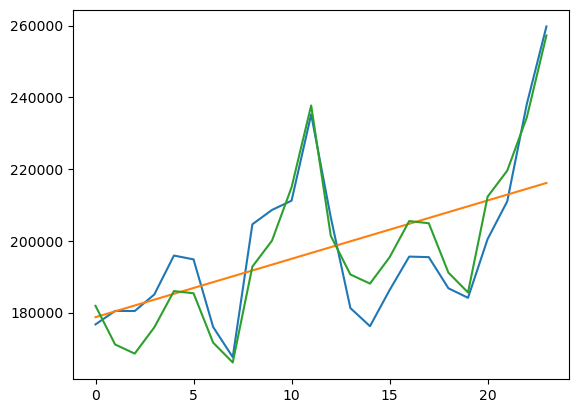

In [41]:
train_model['Y'].plot(kind = 'line')
train_model['linear_pred_Trend'].plot(kind = 'line')
train_model['Actual_Prediction'].plot(kind = 'line')
plt.show()

In [42]:
test_model = pd.DataFrame(range(25,37), columns=['X'])
test_model['Y'] = test['Value'].values

In [43]:
test_model

,X,Y
0,25,207572
1,26,182283
2,27,177225
3,28,187280
4,29,196622
5,30,196471
6,31,187797
7,32,185135
8,33,201510
9,34,212006


In [44]:
model.predict(test_model[['X']])

array([217767.15942029, 219393.11550725, 221019.0715942 , 222645.02768116,
       224270.98376812, 225896.93985507, 227522.89594203, 229148.85202899,
       230774.80811594, 232400.7642029 , 234026.72028986, 235652.67637681])

In [45]:
test_model['linear_pred_Trend'] = model.predict(test_model[['X']])

In [46]:
test_model

,X,Y,linear_pred_Trend
0,25,207572,217767.159420
1,26,182283,219393.115507
2,27,177225,221019.071594
3,28,187280,222645.027681
4,29,196622,224270.983768
5,30,196471,225896.939855
6,31,187797,227522.895942
7,32,185135,229148.852029
8,33,201510,230774.808116
9,34,212006,232400.764203


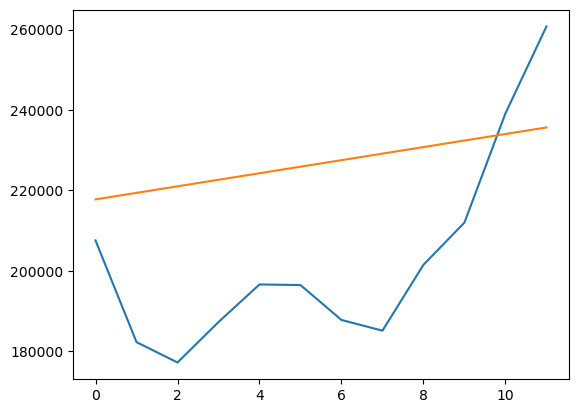

In [47]:
test_model['Y'].plot(kind = 'line')
test_model['linear_pred_Trend'].plot(kind = 'line')
plt.show()

In [48]:
test_model['Month_component'] = list(range(1,13))

In [49]:
test_model

,X,Y,linear_pred_Trend,Month_component
0,25,207572,217767.159420,1
1,26,182283,219393.115507,2
2,27,177225,221019.071594,3
3,28,187280,222645.027681,4
4,29,196622,224270.983768,5
5,30,196471,225896.939855,6
6,31,187797,227522.895942,7
7,32,185135,229148.852029,8
8,33,201510,230774.808116,9
9,34,212006,232400.764203,10


In [50]:
Average_Seasonality_Factor_test = pd.DataFrame(train_model_seasonal_monthly_component[test_model['Month_component']]).reset_index()
             

In [51]:
Average_Seasonality_Factor_test.columns = ["Month_component", "Average_Seasonality_Factor"]

In [52]:
Average_Seasonality_Factor_test

,Month_component,Average_Seasonality_Factor
0,1,3152.050145
1,2,-9241.405942
2,3,-13411.862029
3,4,-7702.818116
4,5,764.725797
5,6,-1469.730290
6,7,-16857.686377
7,8,-24011.142464
8,9,1059.401449
9,10,6678.945362


In [53]:
test_model['Average_Seasonality_Factor'] = Average_Seasonality_Factor_test['Average_Seasonality_Factor']


In [54]:
test_model

,X,Y,linear_pred_Trend,Month_component,Average_Seasonality_Factor
0,25,207572,217767.159420,1,3152.050145
1,26,182283,219393.115507,2,-9241.405942
2,27,177225,221019.071594,3,-13411.862029
3,28,187280,222645.027681,4,-7702.818116
4,29,196622,224270.983768,5,764.725797
5,30,196471,225896.939855,6,-1469.730290
6,31,187797,227522.895942,7,-16857.686377
7,32,185135,229148.852029,8,-24011.142464
8,33,201510,230774.808116,9,1059.401449
9,34,212006,232400.764203,10,6678.945362


In [55]:
test_model['Actal_Forecast_Linear_with_seasonality'] = test_model['linear_pred_Trend'] + test_model['Average_Seasonality_Factor']


In [56]:
test_model

,X,Y,linear_pred_Trend,Month_component,Average_Seasonality_Factor,Actal_Forecast_Linear_with_seasonality
0,25,207572,217767.159420,1,3152.050145,220919.209565
1,26,182283,219393.115507,2,-9241.405942,210151.709565
2,27,177225,221019.071594,3,-13411.862029,207607.209565
3,28,187280,222645.027681,4,-7702.818116,214942.209565
4,29,196622,224270.983768,5,764.725797,225035.709565
5,30,196471,225896.939855,6,-1469.730290,224427.209565
6,31,187797,227522.895942,7,-16857.686377,210665.209565
7,32,185135,229148.852029,8,-24011.142464,205137.709565
8,33,201510,230774.808116,9,1059.401449,231834.209565
9,34,212006,232400.764203,10,6678.945362,239079.709565


In [57]:
print("Linear Prediction MAPE : ")
print(mean_absolute_percentage_error(test_model['Y'],test_model['linear_pred_Trend'] ))
print("Linear with Seasonality Prediction MAPE")
print(mean_absolute_percentage_error(test_model['Y'],test_model['Actal_Forecast_Linear_with_seasonality'] ))

Linear Prediction MAPE : 
0.14895498455326206
Linear with Seasonality Prediction MAPE
0.1211998965116634


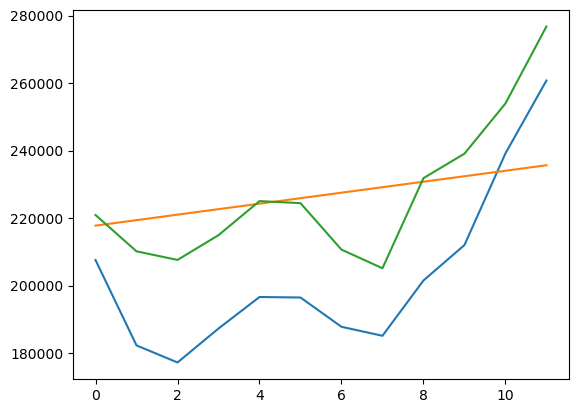

In [58]:
test_model['Y'].plot(kind = 'line')
test_model['linear_pred_Trend'].plot(kind = 'line')
test_model['Actal_Forecast_Linear_with_seasonality'].plot(kind = 'line')
plt.show()